In [1]:
NAME = "" # put your full name here
COLLABORATORS = [] # list names of anyone you worked with on this homework.

# [ERG 131] Homework 6: Gradient Descent and Geopandas

This homework focuses on gradient descent, with a small portion on Geopandas. 

Before we dive into the data and the homework, let's set up our motivation for exploring gradient descent. So far, we've been finding model parameters for linear regression by defining a loss function: a function that we want to minimize. Specifically, this loss function has been the mean squared error (MSE) - the linear regression fitting that we did in homework 5 and lab 5 worked by solving for the $\theta$ values that minimize the mean squared error of the training data. To minimize the MSE, we have to take its derivative, set it to zero, and solve for the parameters.<br>

This process isn't always feasible. One reason for this is that when you have a problem with a lot of response variables (features), setting the MSE derivative to equal zero becomes computationally intensive and involves inverting a very large matrix; when you have a model with a more complex form than linear regression, finding a derivative of the loss function and setting it to zero can be difficult.  A second reason is that some of the loss functions you might encounter can't be massaged into a form that allows you to find the parameters algebraically.  <br>

This is where gradient descent comes in! For complex models, or models with many features, it's a more efficient way to compute the loss function and find the minimum. 


### Table of Contents
1. [A Simple Model](#model)<br>
1. [Fitting the Model](#fitting)<br>
1. [Increasing Model Complexity](#complexity)<br>
1. [Gradient Descent](#gd)<br>
1. [Geopandas](#gp)<br>
1. [Project](#project)<br>

**Dependencies:**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import warnings 
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight') 

# Set some parameters
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 14
np.set_printoptions(4)

In [3]:
# We will use plot_3d helper function to help us visualize gradient
from hw6_utils import plot_3d

----

## Load Data
For this homework, we'll be working with some more theoretical data.
Load the data.csv file into a pandas dataframe.  
Note that we are reading the data directly from the URL address.

In [4]:
# Run this cell to load our sample data
data = pd.read_csv("http://www.ds100.org/sp18/assets/datasets/hw5_data.csv", index_col=0)
data.head()

,x,y
0,-5.000000,-7.672309
1,-4.966555,-7.779735
2,-4.933110,-7.995938
3,-4.899666,-8.197059
4,-4.866221,-8.183883


---

## Section 1. A Simple Model<a id='model'></a>
Let's start by examining our data and creating a simple model that can represent this data.<br>

**Question 1.1** Define a function `scatter()` that produces a scatter plot. It should take as input the x and y values, and produce a scatter plot with axis labels.<br>

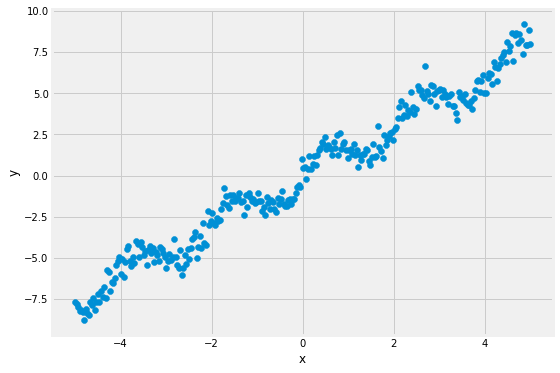

In [6]:
# SOLUTION
def scatter(x, y):
    """
    Generate a scatter plot using x and y

    Keyword arguments:
    x -- the vector of values x
    y -- the vector of values y
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y)
    plt.xlabel('x')
    plt.ylabel('y')

x = data['x']
y = data['y']
scatter(x,y)
plt.show()

**Question 1.2:** Describe any significant observations about the distribution of the data. How can you describe the relationship between $x$ and $y$?

*Your answer here*

**Question 1.3:** For now, let's assume that the data follows some linear model, parametrized by $\theta$:

$\Large
\hat{y} = \theta \cdot x
$

Define a linear model function `linear_model()` that produces a value $\hat{y}$ given $x$ and $\theta$, where $x$ is a vector of observations and $\theta$ is a scalar value.

In [8]:
# SOLUTION
def linear_model(x, theta):
    """
    Returns the estimate of y given x and theta

    Keyword arguments:
    x -- the vector of values x
    theta -- the scalar theta
    """
    y_hat = theta * x

    return y_hat

In [9]:
# run this cell, do not change it
assert linear_model(0, 1) == 0
assert linear_model(10, 10) == 100
assert np.sum(linear_model(np.array([3, 5]), 3)) == 24
assert linear_model(np.array([7, 8]), 4).mean() == 30

**Question 1.4:** In class, we learned that the $L^2$ loss function (i.e. the mean squared error) is smooth and continuous. Let's use $L^2$ loss to find an optimal value for $\theta$. First, we'll define the $L^2$ loss function `l2_loss` below, that calculates the value of $L^2$ given a set of actual observations $y$ and predictions $\hat{y}$.

In [11]:
# SOLUTION
def l2_loss(y, y_hat):
    """
    Returns the average l^2 loss given y and y_hat

    Keyword arguments:
    y -- the vector of true values y
    y_hat -- the vector of predicted values y_hat
    """
    return np.mean((y - y_hat)**2)


In [12]:
# run this cell, do not change it
assert l2_loss(2, 1) == 1
assert l2_loss(2, 0) == 4 
assert l2_loss(5, 1) == 16
assert l2_loss(np.array([5, 6]), np.array([1, 1])) == 20.5
assert l2_loss(np.array([1, 1, 1]), np.array([4, 1, 4])) == 6.0

**Question 1.5:** Write a function `l2_plot()` that produces a plot of $L^2$ loss as a function of the coefficient $\theta$. Your function should take inputs $x$ and $y$, which are vectors of $x$ and $y$ observations, and input `thetas`, which is a list of possible thetas.<br>

Then, run the function `l2_plot()` using the $x$ and $y$ values from dataframe `data` above and a list of `thetas` (you can define this range yourself - the `np.linspace()` function might be helpful here). You should end up with a plot of $\theta$ values on the x-axis, and the $L^2$ loss corresponding with those $\theta$ values on the y-axis.  Make sure to label your axes and add a title.<br>

What looks like the optimal $\theta$ value based on the visualization? We'll call this value $\theta^*$.  Set the variable `theta_star_guess` to the value of $\theta$ that appears to minimize our loss.

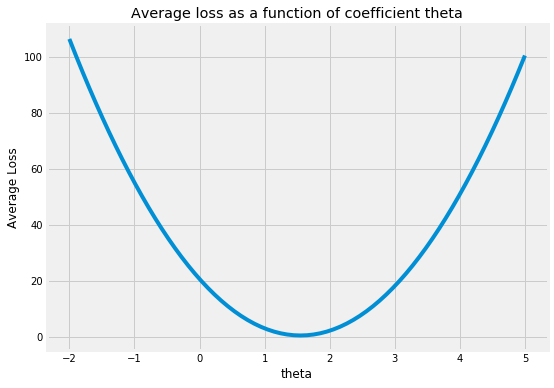

In [14]:
#SOLUTION
def l2_plot(x, y, thetas):
    """
    Plots the average l2 loss for given x, y as a function of theta.
    Use the functions you wrote for linear_model and l2_loss.

    Keyword arguments:
    x -- the vector of values x
    y -- the vector of values y
    thetas -- the vector containing different estimates of theta
    """
    avg_loss = [l2_loss(y, y_hat) for y_hat in [linear_model(x, theta) for theta in thetas]] 
    # Calculate the loss here for each value of theta
    
    plt.figure(figsize=(8,6))
    
    plt.plot(thetas, avg_loss)
    plt.xlabel('theta')
    plt.ylabel('Average Loss') 
    plt.title("Average loss as a function of coefficient theta")
    # Create your plot here

    
thetas = np.linspace(-2, 5, 70)
l2_plot(x, y, thetas)
plt.show()

theta_star_guess = 1.5

In [15]:
assert l2_loss(3, 2) == 1
assert l2_loss(0, 10) == 100
assert 1 <= theta_star_guess <= 2

---
## Section 2: Fitting our Simple Model<a id='fitting'></a>
Now that we have defined a simple linear model and loss function, let's begin working on fitting our model to the data.

**Question 2.1:** Let's confirm our visual findings for our optimal coefficient $\theta^*$. First, let's identify the analytical solution for the optimal $\theta^*$ that minimizes average $L^2$ loss. Of the three options, below, which correctly gives the formula that tells us what $\theta^*$ is given $i$ observations of $x$ and $y$? Highlight your answer in <font color = "red">red</font> (double click this cell if you don't know how to do this).

1. $$\Large {\theta}^* = \frac{\sum x_i + y_i}{\sum x_i^2}$$ <br>
2. $$\Large {\theta}^* = \frac{\sum x_iy_i}{\sum x_i}$$ <br>
3. $$\Large {\theta}^* = \frac{\sum x_iy_i}{\sum x_i^2}$$ <br>

**Solution: 3**

**Question 2.2:** 
Now that we have the analytic solution for $\theta^*$, implement the function `find_theta` that calculates the numerical value of $\theta^*$ based on our data $x$, $y$.

In [17]:
# SOLUTION
def find_theta(x, y):
    """
    Find optimal theta given x and y

    Keyword arguments:
    x -- the vector of values x
    y -- the vector of values y
    """
    theta_opt = np.sum(np.multiply(x,y))/np.sum(np.multiply(x,x))
    return theta_opt

t_star = find_theta(x, y)

In [18]:
# run this cell; do not change it
print(f'theta_opt = {t_star}')
assert 1.5 <= t_star <= 1.7

theta_opt = 1.5502648085962225


**Question 2.3:** Now, let's plot our loss function again using the `l2_plot()` function. But this time, add a vertical line at the optimal value of theta (i.e. plot the line $x = \theta^*$). The function `plt.axvline()` is helpful here.

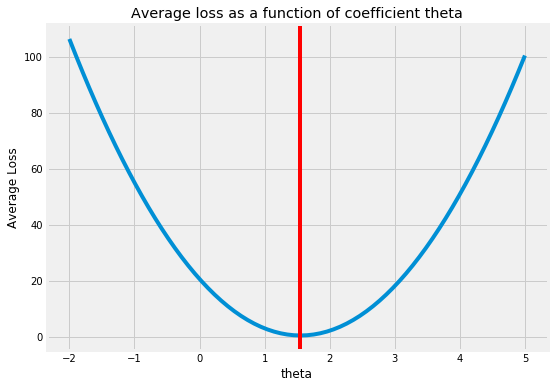

In [20]:
# SOLUTION
l2_plot(x, y, thetas)
plt.axvline(x=t_star, color='r')

<br> 
**Question 2.4:** We now have an optimal value for $\theta$ that minimizes our loss. In the cell below, plot the scatter plot of the data from Question 1a (you can reuse the `scatter()` function here). But this time, add the best fit line $\hat{y} = \theta^* \cdot x$ using the $\theta^*$ you computed above.

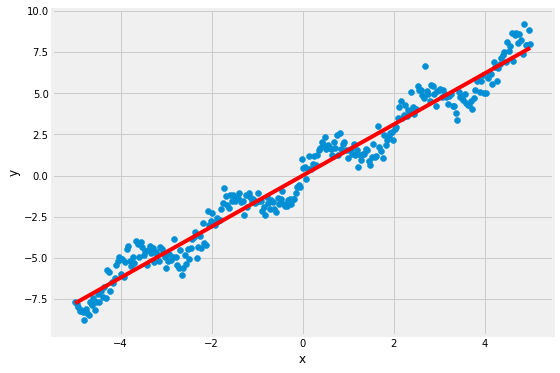

In [22]:
# SOLUTION
scatter(x,y)
plt.plot(x, t_star*x, color='r')
plt.show()

**Question 2.5:** Great! It looks like our estimate for $\theta$ is able to capture a lot of the data with a single parameter. Now let's try to plot the residual to see what we've missed.<br>  

The residual is defined as $r=y-\theta^* \cdot x$. Below, write a function to find the residual and plot the residuals as a function of the independent variable in a scatter plot. Plot a horizontal line at $y=0$ to assist with visualization. Add axis labels..

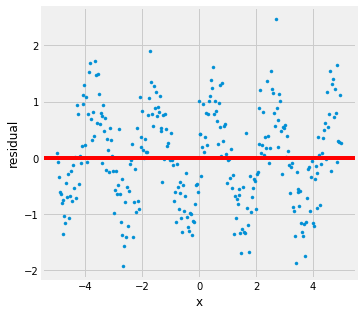

In [23]:
def visualize_residual(x, y):
    """
    Plot a scatter plot of the residuals, the remaining 
    values after removing the linear model from our data.

    Keyword arguments:
    x -- the vector of values x
    y -- the vector of values y
    """
    # calculate residual
    r = y - linear_model(x, find_theta(x,y))
    
    # plot residual
    plt.figure(figsize = (5,5))
    plt.scatter(x, r, marker='.')
    plt.axhline(0, color = 'r')
    plt.xlabel('x')
    plt.ylabel('residual')

visualize_residual(x, y)
plt.show()

**Question 2.6:** What does the residual look like? Do you notice a relationship between $x$ and $r$?

**Possible answer:** the residual oscillates, and *r* seems to be a periodic function of *x* (i.e. a sinusidal function).

---
## Section 3: Increasing Model Complexity<a id='complexity'></a>

It looks like the remaining data is sinusoidal, meaning our original data follows a linear function and a sinusoidal function. Let's define a new model to address this discovery and find optimal parameters to best fit the data:

$$\Large
\hat{y} = \theta_1x + sin(\theta_2x)
$$

Now, our model is parameterized by both $\theta_1$ and $\theta_2$, or composed together, $\vec{\theta}$.

Note that a generalized sine function $a\sin(bx+c)$ has three parameters: amplitude scaling parameter $a$, frequency parameter $b$ and phase shifting parameter $c$. We can assume that the scaling and shifting parameter ($a$ and $c$ in this case) are 1 and 0 respectively. 

**Question 3.1:** In the following cell, **explain why we can assume the scaling parameter to be 1 and shifting parameter to be 0 based on the residual plot in Question 2e**. 

You might find the following code helpful in visualizing all three parameters.

```python
def plot_sin_generalized(a,b,c,label=None):
    """Plot a sin function with three parameters"""
    X = np.linspace(-5, 5)
    Y = a * np.sin(b*X + c)
    plt.scatter(X, Y, label=label)
    plt.legend()
```

You can try plotting: 
```python
plot_sin_generalized(1,1,1, label='sin(x)')
plot_sin_generalized(1,1,2, label='sin(x + 2)')
plot_sin_generalized(1,2,2, label='sin(2x + 2)')
plot_sin_generalized(2,2,2, label='2sin(2x + 2)')
```

In [24]:
# use this cell for scratch work

*Your answer here*

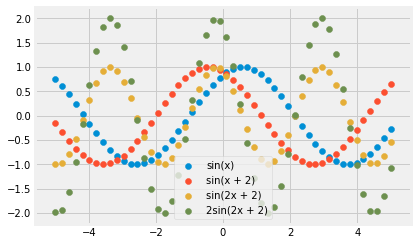

In [25]:
# SOLUTION
def plot_sin_generalized(a,b,c,label=None):
    """Plot a sin function with three parameters"""
    X = np.linspace(-5, 5)
    Y = a * np.sin(b*X + c)
    plt.scatter(X, Y, label=label)
    plt.legend()
    
plot_sin_generalized(1,1,1, label='sin(x)')
plot_sin_generalized(1,1,2, label='sin(x + 2)')
plot_sin_generalized(1,2,2, label='sin(2x + 2)')
plot_sin_generalized(2,2,2, label='2sin(2x + 2)')
plt.show()

Possible Answer: The shifting parameter is 0 because the graph has a point at the origin, meaning it is not shifted left or right.
The scaling parameter is 1 because the points seem to be spread around a sine wave going from -1 to 1. 

**Question 3.2:** As in Question 1, write a function that predicts a value $\hat{y}$ given an input $x$ based on our new model.

*Hint:* Try to do this without using for loops. The `np.sin` function may help you.

In [26]:
# student version
# def sin_model(x, theta_1, theta_2):
#     """
#     Predict the estimate of y given x, theta_1, theta_2

#     Keyword arguments:
#     x -- the vector of values x
#     theta_1 -- the scalar value theta_1
#     theta_2 -- the scalar value theta_2
#     """
    
#     # YOUR CODE HERE

In [27]:
# SOLUTION
def sin_model(x, theta_1, theta_2):
    """
    Predict the estimate of y given x, theta_1, theta_2

    Keyword arguments:
    x -- the vector of values x
    theta_1 -- the scalar value theta_1
    theta_2 -- the scalar value theta_2
    """
    y_hat = linear_model(x, theta_1) + np.sin(theta_2 * x)
    return y_hat

In [28]:
print(np.isclose(sin_model(1, 1, np.pi), 1.0000000000000002))
# Check that we accept x as arrays
assert len(sin_model(x, 2, 2)) > 1

True


**Question 3.3:** In this question your job is to match the left and right sides of the equations for:
1. The $L^2$ loss for for the `sin` model, $\hat{y} = \theta_1x + sin(\theta_2x)$.  We'll call that $L(x, y, \theta_1, \theta_2)$.
2. The partial derivatives of the `sin` model loss functions, $\frac{\partial L }{\partial \theta_1}, \frac{\partial L }{\partial \theta_2}$. 

Notice that we now have $\vec{x}$ and $\vec{y}$ instead of $x$ and $y$. This means that when determining the loss function $L(x, y, \theta_1, \theta_2)$, you'll need to take the average of the squared losses for each $y_i$, $\hat{y_i}$ pair.

As your answer below, match the right side (letters) to the correct left sides (numbers).

1. $L(x, y, \theta_1, \theta_2)$ <br>
2. $\frac{\partial L}{\partial \theta_1}$ <br>
3. $\frac{\partial L}{\partial \theta_2}$ <br>

A.  $\frac{1}{n} \sum_{i=1}^n (y_i - \theta_1 x_i - \sin(\theta_2 x_i)) ^ 2$ <br>
B. $-\frac{2}{n} \sum_{i=1}^n (x_i y_i \cos(\theta_2 x_i) - \theta_1 x_i ^ 2 \cos(\theta_2 x_i) - x_i \sin(\theta_2 x_i)\cos(\theta_2 x_i))$ <br>
C. $-\frac{2}{n} \sum_{i=1}^n (x_i y_i - \theta_1 x_i ^ 2 - x_i \sin(\theta_2 x_i))$


*Your answer*: <br>
1. ... <br>
2. ... <br>
3. ... <br>

Solution: <br>
1. A
2. C
3. B

**Question 3.4:** Now, implement the functions `dt1` and `dt2`, which should compute $\frac{\partial L }{\partial \theta_1}$ and $\frac{\partial L }{\partial \theta_2}$ respectively. Use the formulas you wrote for $\frac{\partial L }{\partial \theta_1}$ and $\frac{\partial L }{\partial \theta_2}$ in the previous exercise. In the functions below, the parameter `theta` is a vector that looks like $( \theta_1, \theta_2 )$.

In [29]:
# student version
# def dt1(x, y, theta):
#     """
#     Compute the numerical value of the partial of l2 loss with respect to theta_1

#     Keyword arguments:
#     x -- the vector of all x values
#     y -- the vector of all y values
#     theta -- the vector of values theta
#     """
#     # YOUR CODE HERE

In [30]:
# student version 
# def dt2(x, y, theta):
#     """
#     Compute the numerical value of the partial of l2 loss with respect to theta_2

#     Keyword arguments:
#     x -- the vector of all x values
#     y -- the vector of all y values
#     theta -- the vector of values theta
#     """
    
#     # YOUR CODE HERE

In [31]:
# SOLUTION
def dt1(x, y, theta):
    """
    Compute the numerical value of the partial of l2 loss with respect to theta_1

    Keyword arguments:
    x -- the vector of all x values
    y -- the vector of all y values
    theta -- the vector of values theta
    """
    to_be_summed = x*y - theta[0]*(x**2) - x*np.sin(theta[1]*x)
    return (-2/len(x))*np.sum(to_be_summed)

In [32]:
# SOLUTION
def dt2(x, y, theta):
    """
    Compute the numerical value of the partial of l2 loss with respect to theta_2

    Keyword arguments:
    x -- the vector of all x values
    y -- the vector of all y values
    theta -- the vector of values theta
    """
    to_be_summed = x*y*np.cos(theta[1]*x) - theta[0]*(x**2)*np.cos(theta[1]*x) - x*np.sin(theta[1]*x)*np.cos(theta[1]*x)
    return (-2/len(x))*np.sum(to_be_summed)

In [33]:
# This function calls dt1 and dt2 and returns the gradient dt. It is already implemented for you.
def dt(x, y, theta):
    """
    Returns the gradient of l2 loss with respect to vector theta

    Keyword arguments:
    x -- the vector of values x
    y -- the vector of values y
    theta -- the vector of values theta
    """
    return np.vstack([
        dt1(x, y, theta),
        dt2(x, y, theta)
    ])

In [34]:
print(np.isclose(dt1(x, y, [0, np.pi]), -25.376660670924529))
print(np.isclose(dt2(x, y, [0, np.pi]), 1.9427210155296564))

True
True


---
## Section 4: Gradient Descent<a id='gd'></a>
Now try to solve for the optimal $\theta^*$ analytically...

**Just kidding!**

You can try but we don't recommend it. When finding an analytic solution becomes difficult or impossible, we resort to alternative optimization methods for finding an approximate solution.

So let's try implementing a numerical optimization method: gradient descent!


**Question 4.1:** Implement the `grad_desc` function that performs gradient descent for a finite number of iterations. This function takes in array $x$, array $y$, and an initial value for $\theta$ (`theta`). `alpha` will be the learning rate (or step size, whichever term you prefer). In this part, we'll use a static learning rate that is the same at every time step. 

At each time step, use the gradient and `alpha` to update your current `theta`. Also at each time step, be sure to save the current `theta` in `theta_history`, along with the $L^2$ loss (computed with the current `theta`) in `loss_history`.

Hints:
- Write out the gradient update equation (1 step). What variables will you need for each gradient update? Of these variables, which ones do you already have, and which ones will you need to recompute at each time step?
- You may need a loop here to update `theta` several times.

In [35]:
# Run me
def init_t():
    """Creates an initial theta [0, 0] as a starting point for gradient descent"""
    return np.zeros((2,1))

In [37]:
# SOLUTION
def grad_desc(x, y, theta, num_iter=20, alpha=0.1):
    """
    Run gradient descent update for a finite number of iterations and static learning rate

    Keyword arguments:
    x -- the vector of values x
    y -- the vector of values y
    theta -- the vector of values theta to use at first iteration
    num_iter -- the max number of iterations
    alpha -- the learning rate (also called the step size)
    
    Return:
    theta -- the optimal value of theta after num_iter of gradient descent
    theta_history -- the series of theta values over each iteration of gradient descent
    loss_history -- the series of loss values over each iteration of gradient descent
    """
    theta_history = []
    loss_history = []
    
    for i in range(num_iter):
        loss_history.append(l2_loss(y, theta[0]*x + np.sin(theta[1]*x)))
        theta = theta - alpha*dt(x,y,theta)
        theta_history.append(theta)
        
    return theta, theta_history, loss_history

In [38]:
# run this cell, do not change them
t = init_t() # set initial theta values to 0
t_est, ts, loss = grad_desc(x, y, t)

print(len(ts) == len(loss) == 20) # theta history and loss history are 20 items in them
print(ts[0].shape == (2,1)) # theta history contains theta values
print(np.isscalar(loss[0])) # loss history is a list of scalar values, not vector

print(loss[1] - loss[-1] > 0) # loss is decreasing

print(np.allclose(np.sum(t_est), 4.5, atol=2e-1))  # theta_est should be close to our value

True
True
True
True
True


**Question 4.2:** Let's visually inspect our results of running gradient descent to optimize $\theta$. Plot our x values with our model's predicted y values over the original scatter plot. Did gradient descent successfully optimize $\theta$?

In [39]:
# Run me
t = init_t()
t_est, ts, loss = grad_desc(x, y, t)

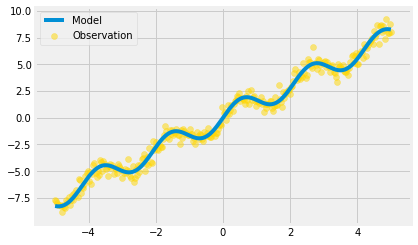

In [41]:
# solution
y_pred = sin_model(x, t_est[0], t_est[1])

plt.plot(x, y_pred, label='Model')
plt.scatter(x, y, alpha=0.5, label='Observation', color='gold')
plt.legend()
plt.show()

**Question 4.3:** Let's visualize gradient descent to see how it converges. Plot the loss values on the y-axis and the iteration number on the x-axis for your gradient descent. 

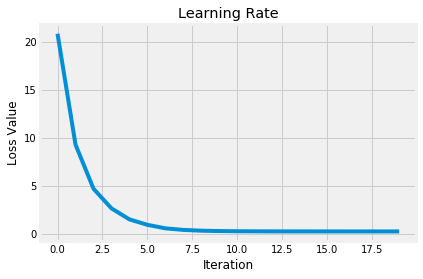

In [43]:
plt.plot(loss)
plt.xlabel('Iteration')
plt.ylabel('Loss Value')
plt.title("Learning Rate")
plt.show()

**Question 4.4:** Create a single plot that shows the iteration (x-axis) vs the loss value (y-axis) for different values of `alpha`: try using `alpha` = 0.01, `alpha` = 0.005, and `alpha` = 0.2. Add a legend. How does the loss value change over different iterations when alpha varies? Based on what you know about gradient descent, why does the loss value change in this way?<br>

*Note*: if you have a function that returns multiple values, but you only care about some of those values, you can use `_` to indicate that you don't want to save a given output. For instance, running: `_,_, loss = grad_desc(x, y, t)` would only save the return value for `loss_history`, and not `theta` or `theta_history`. This can save you some memory.

Text(0, 0.5, 'Loss value')

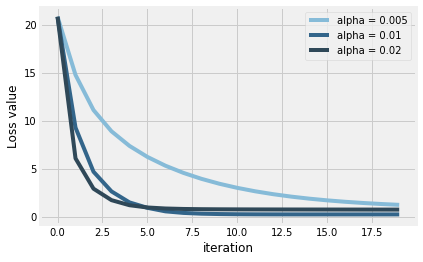

In [52]:
# SOLUTION
_,_,a005 = grad_desc(x, y, t, alpha = 0.005)
_,_,a01 = grad_desc(x, y, t)
_,_,a02 = grad_desc(x, y, t, alpha = 0.02)

for a_list, a_value, a_color in zip([a005,a01,a02],[0.005,0.01,0.02], ["#86BBD8","#33658A", "#2F4858"]):
    plt.plot(a_list, label = "alpha = " + str(a_value), color = a_color)
    
plt.legend()
plt.xlabel("iteration")
plt.ylabel("Loss value");

**Possible answer:** Key points are that at higher alphas, the loss value converges more quickly - for alpha = 0.02, it takes about 5 iterations, for alpha = 0.01, it takes about 6 iterations, and for alpha = 0.02 it takes over 17. This happens because gradient descent updates its estimate for theta based on two values: the gradient at the previous value of theta, and the learning rate. At a larger learning rate, the updated estimate for alpha will converge more quickly because the gradient descent is taking larger "jumps" along the loss function.

A complete answer should explain the trend (how the curve changes with learning rate) and the reasoning.

---

## Section 5: GeoPandas<a id='gp'></a>

In this section, you'll be using what you learned in lab 6. Use the cells below to load the necessary packages and data (you can use the data sources provided in the lab), and then write a function that returns a **list** of all the countries that a given river crosses. Make sure to have a code block at the end that uses your function to output the countries through which the Danube and Mekong rivers cross.

In [48]:
# SOLUTION
import geopandas as gpd

!wget https://www.dropbox.com/s/eu2acphgoivj7y7/world_countries.zip
countries = gpd.read_file("zip://./world_countries.zip")

!wget https://www.dropbox.com/s/76nb1xkkyclqhz0/rivers.zip
rivers = gpd.read_file("zip://./rivers.zip")

Will not apply HSTS. The HSTS database must be a regular and non-world-writable file.
ERROR: could not open HSTS store at '/home/jovyan/.wget-hsts'. HSTS will be disabled.
--2019-10-10 13:54:04--  https://www.dropbox.com/s/eu2acphgoivj7y7/world_countries.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/eu2acphgoivj7y7/world_countries.zip [following]
--2019-10-10 13:54:04--  https://www.dropbox.com/s/raw/eu2acphgoivj7y7/world_countries.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc45a89b4b27e0aa3c73d5562c91.dl.dropboxusercontent.com/cd/0/inline/AqN0Ekqd3VuWj5p9i6hilh1RjxrOiqopaBNC3xZullkCWmNz6F7uXQ63ZQKA01fe5OPrBHCnilNLrvxHjn0va7mn_pIvp1hv37Kz9hcogTPzcL83VQVZbNjXIEpH7P2CSXQ/file# [following]
--2019-10-10 13:54:04

In [49]:
# SOLUTION 
def countries_crossed(riverName):
    return countries[countries.crosses(rivers[rivers["name"] == riverName].geometry.squeeze())].name.tolist()

In [50]:
# SOLUTION
# use countries_crossed() to show countries crossed by the Danube river
print(countries_crossed("Danube"))

# use countries_crossed() to show countries crossed by the Mekong river
print(countries_crossed("Mekong"))

['Bulgaria', 'Croatia', 'Hungary', 'Romania', 'Serbia', 'Slovakia']
['Cambodia', 'Laos', 'Thailand', 'Vietnam']


---

## Section 6: Project<a id='project'></a>

In this section, we'll be asking you to work with one of the datasets you'll be using for your project. Every member of your group should choose a different dataset when answering the following questions.

**Question 5.1** In a few sentences, explain how you obtained this data and how it was collected.

*Your answer here*

**Question 5.2** Briefly summarize the structure, granularity, scope, temporality and faithfulness (write 1-2 sentences for each of structure, granularity, etc). Is there any aspect of this dataset that is limiting, or any reason to question its validity?

*Your answer here*

**Question 5.3** Specify three data cleaning operations that you will have to perform on this dataset.

*Your answer here*


----

## Bibliography

+ Data 100 - HW 5: Modeling, Estimation and Gradient Descent

<hr/>

Data Science Modules: http://data.berkeley.edu/education/modules